# Lecture 7: Ensemble Methods (Code used in the slides)

# Majority Voting

In [5]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.ensemble import VotingClassifier

iris = datasets.load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
class_names = iris.target_names

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.25, random_state=1)

X_train, X_val, y_train, y_val = \
    train_test_split(X_train, y_train, test_size=0.25, random_state=1)

print('Train/Valid/Test sizes:', y_train.shape[0], y_val.shape[0], y_test.shape[0])

clf1 = DecisionTreeClassifier(random_state=1)
clf2 = DecisionTreeClassifier(random_state=1, max_depth=1)
clf3 = DecisionTreeClassifier(random_state=1, max_depth=3)
##### Using majority voting where all the predictions have the same importance
eclf = VotingClassifier(estimators=[('dt1', clf1), ('dt2', clf2), ('dt3', clf3)], voting='hard')
##### Using "soft" voting where classifiers have different weights
eclf_soft = VotingClassifier(estimators=[('dt1', clf1), ('dt2', clf2), ('dt3', clf3)], voting='soft', weights=[2,1,3])

labels = ['Classifier 1', 'Classifier 2', 'Classifier 3', 'Ensemble hard', 'Ensemble soft']
for clf, label in zip([clf1, clf2, clf3, eclf, eclf_soft], labels):

    clf.fit(X_train, y_train)
    print("Validation Accuracy: %0.2f [%s]" % (clf.score(X_val, y_val), label))
    
print("Test Accuracy (hard): %0.2f" % eclf.score(X_test, y_test))
print("Test Accuracy (soft): %0.2f" % eclf_soft.score(X_test, y_test))

Train/Valid/Test sizes: 84 28 38
Validation Accuracy: 0.96 [Classifier 1]
Validation Accuracy: 0.82 [Classifier 2]
Validation Accuracy: 1.00 [Classifier 3]
Validation Accuracy: 1.00 [Ensemble hard]
Validation Accuracy: 0.96 [Ensemble soft]
Test Accuracy (hard): 0.97
Test Accuracy (soft): 0.97


# Bagging

In [6]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier

iris = datasets.load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
class_names = iris.target_names

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.25, random_state=1)

X_train, X_val, y_train, y_val = \
    train_test_split(X_train, y_train, test_size=0.25, random_state=1)

# We won't use the validation set, but we will recall doing so for model tuning.
print('Train/Valid/Test sizes:', y_train.shape[0], y_val.shape[0], y_test.shape[0])

tree = DecisionTreeClassifier(criterion='entropy',
                              random_state=1,
                              max_depth=None)   # unpruned decision tree!


bag = BaggingClassifier(estimator=tree,
                        n_estimators=500, # number of bootstrap rounds, typically a large number
                        oob_score=True,
                        bootstrap=True,
                        bootstrap_features=False,
                        n_jobs=1, # number of CPUs, change for parallelisation (-1 uses all CPUs)
                        random_state=1)

bag.fit(X_train, y_train)
    
print("OOB Accuracy: %0.2f" % bag.oob_score_)
print("Test Accuracy: %0.2f" % bag.score(X_test, y_test))

Train/Valid/Test sizes: 84 28 38
OOB Accuracy: 0.95
Test Accuracy: 0.97


Accuracy of a single decision tree.

Test Accuracy: 0.97


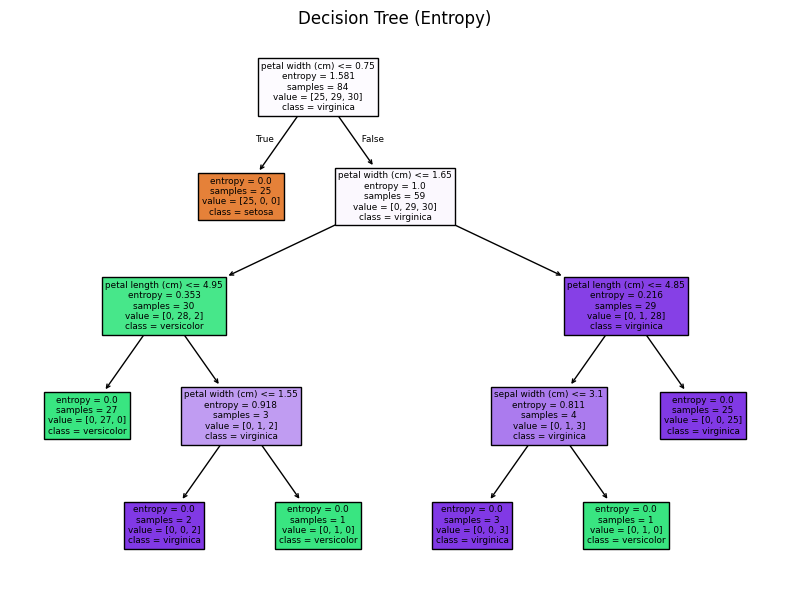

In [10]:
tree = DecisionTreeClassifier(criterion='entropy',
                              random_state=1,
                              max_depth=None)

tree.fit(X_train, y_train)

print("Test Accuracy: %0.2f" % tree.score(X_test, y_test))

plt.figure(figsize=(8,6))
plot_tree(tree, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree (Entropy)")
plt.tight_layout()
plt.show()

Accuracy of a decision tree stump.

In [9]:
tree = DecisionTreeClassifier(criterion='entropy',
                              random_state=1,
                              max_depth=1)

tree.fit(X_train, y_train)

print("Test Accuracy: %0.2f" % tree.score(X_test, y_test))

Test Accuracy: 0.58


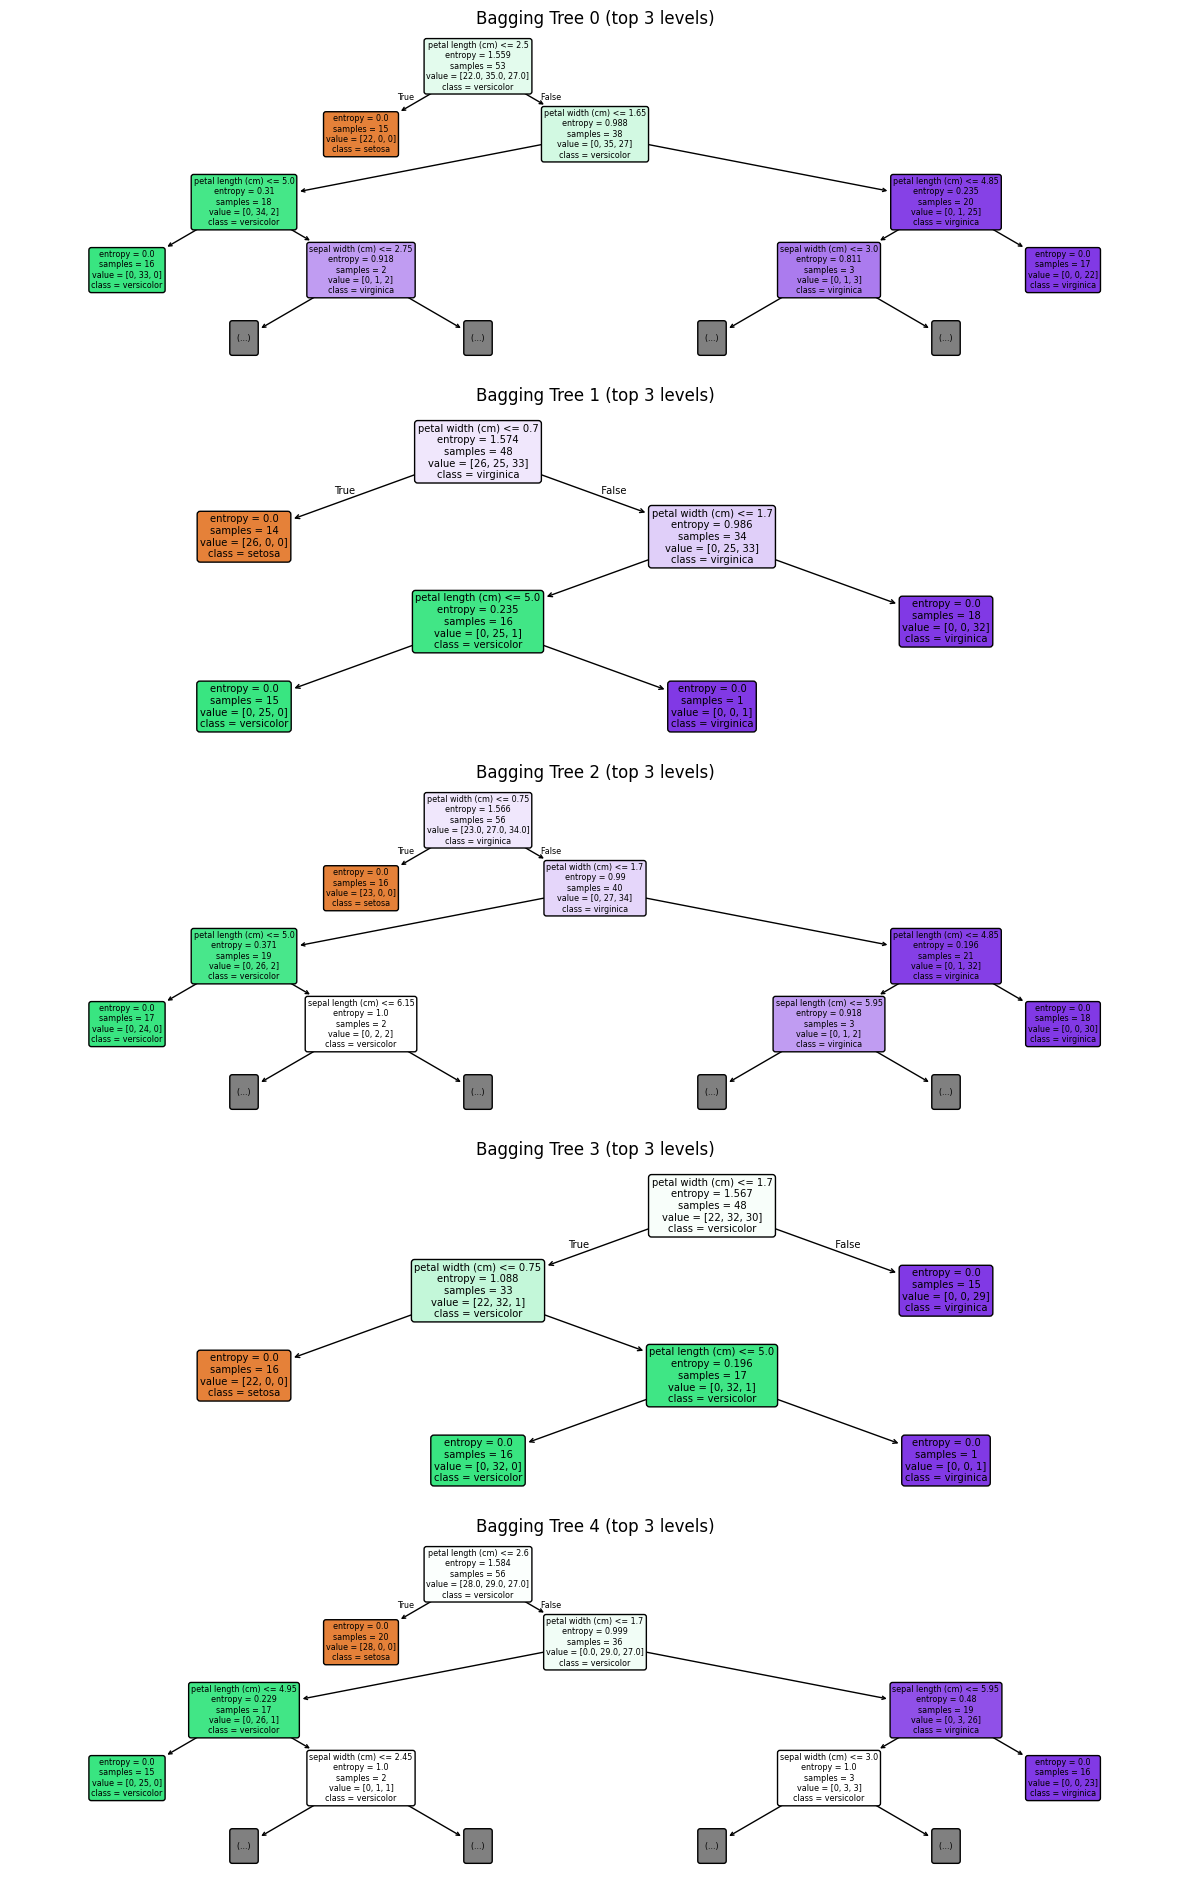

In [14]:
# plot a few trees learnt by bagging
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Configure how many trees to plot and how many levels to show
NUM_TREES = 5     # number of trees to visualise
MAX_DEPTH = 3     # only draw top levels to keep plots readable

n_to_plot = NUM_TREES
fig, axes = plt.subplots(nrows=n_to_plot, ncols=1, figsize=(12, 3.8 * n_to_plot))
if n_to_plot == 1:
    axes = [axes]

for i, ax in enumerate(axes):
    plot_tree(
        bag.estimators_[i],
        feature_names=feature_names,
        class_names=class_names,
        filled=True,
        rounded=True,
        impurity=True,
        max_depth=MAX_DEPTH,  # just the top levels
        ax=ax
    )
    ax.set_title(f"Bagging Tree {i} (top {MAX_DEPTH} levels)")

plt.tight_layout()
plt.show()

# Random Forests

In [3]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.datasets import load_iris

#iris = datasets.load_iris()
#X, y = iris.data[:, [0, 3]], iris.target

iris = datasets.load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
class_names = iris.target_names

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.25, random_state=1)

X_train, X_val, y_train, y_val = \
    train_test_split(X_train, y_train, test_size=0.25, random_state=1)

print('Train/Valid/Test sizes:', y_train.shape[0], y_val.shape[0], y_test.shape[0])

Train/Valid/Test sizes: 84 28 38


In [4]:
from sklearn.ensemble import RandomForestClassifier

# There are many more hyperparameters
forest = RandomForestClassifier(n_estimators=100, # the larger, the better, use the largest one you can afford 
                                random_state=1)   # by default uses 1 cpu, use n_jobs to change it

forest.fit(X_train, y_train)
    
print("Test Accuracy: %0.2f" % forest.score(X_test, y_test))

Test Accuracy: 0.97


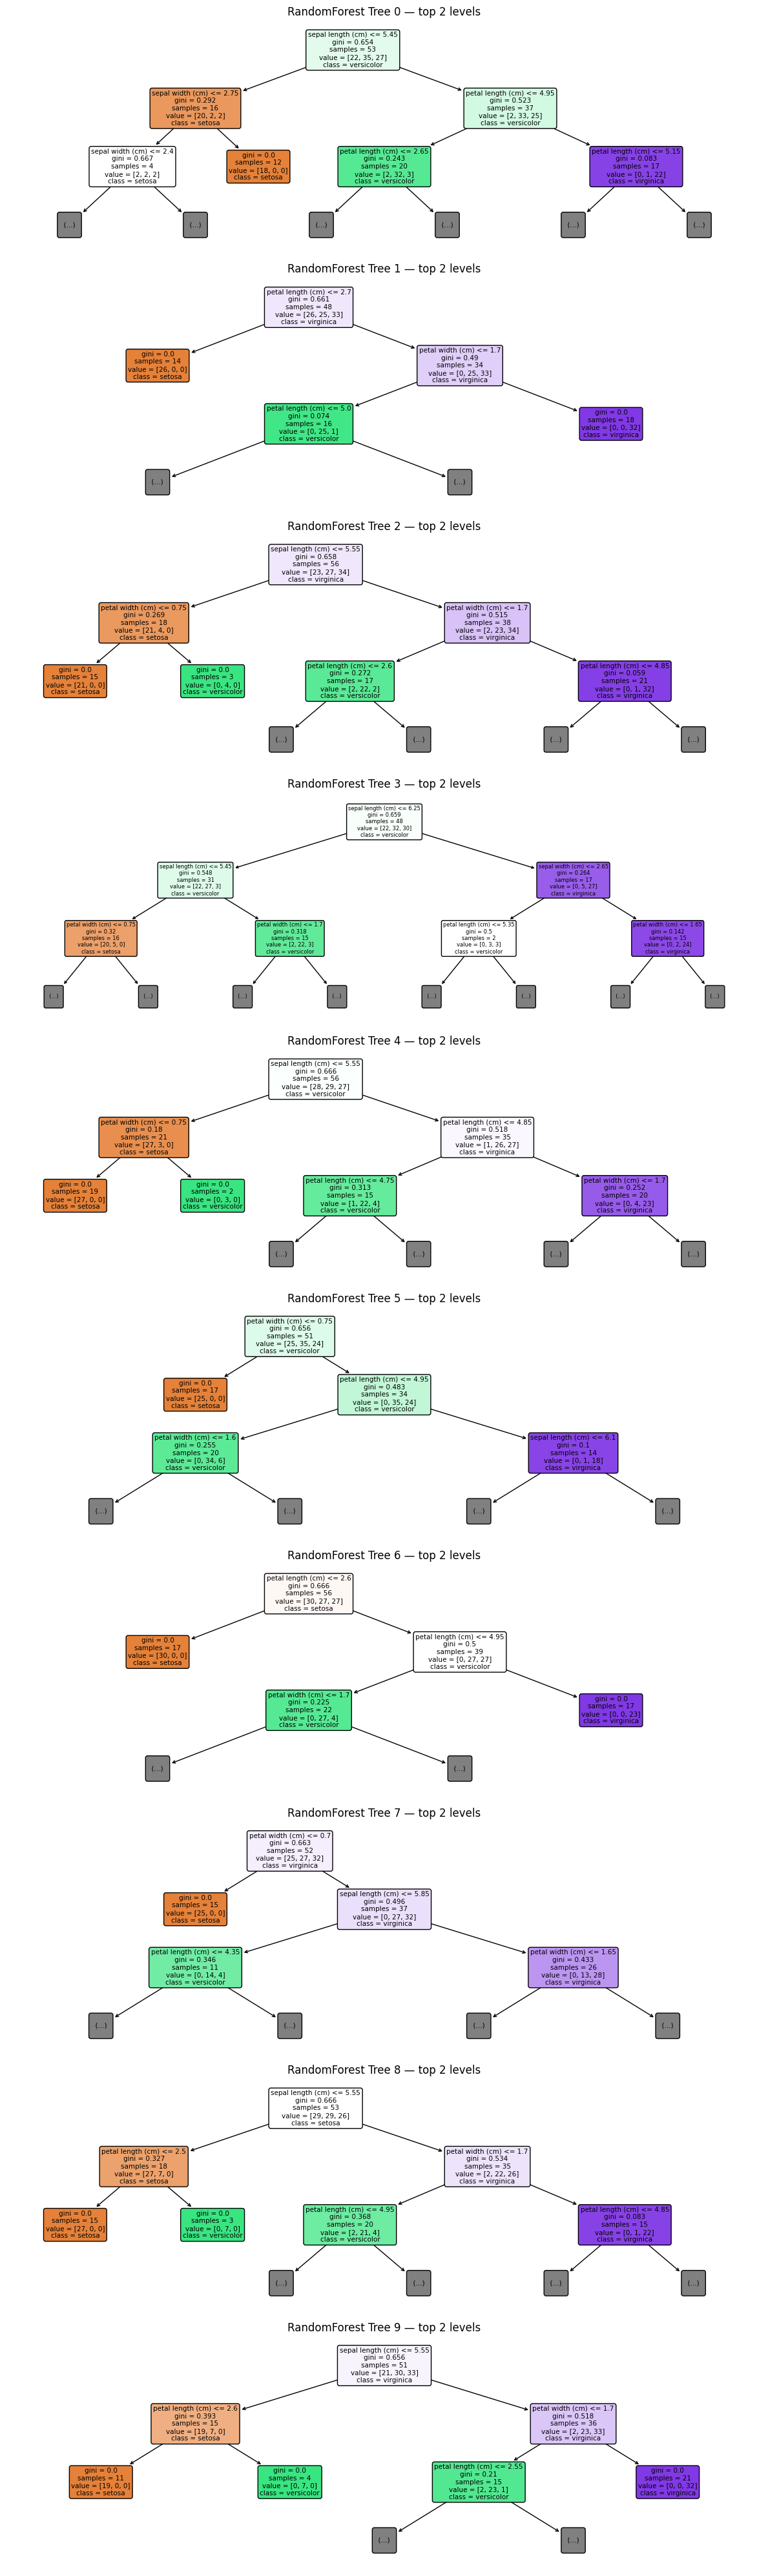

In [5]:
# Plot some trees of the random forest
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Configure  how many trees to plot and how many levels to show
NUM_TREES = 10     # number of trees to visualise (from the start of the forest)
MAX_DEPTH = 2     # only draw top levels to keep plots readable

n = min(NUM_TREES, len(forest.estimators_))
fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(12, 4*n))  # taller figure for more rows
if n == 1:
    axes = [axes]  # make iterable if only one row

for i, ax in enumerate(axes):
    tree = forest.estimators_[i]
    plot_tree(
        tree,
        feature_names=feature_names,
        class_names=class_names,
        filled=True,
        impurity=True,
        rounded=True,
        max_depth=MAX_DEPTH,
        ax=ax
    )
    ax.set_title(f"RandomForest Tree {i} — top {MAX_DEPTH} levels")

plt.tight_layout()
plt.show()

Let's compare the trees in the random forest with a single decision tree.

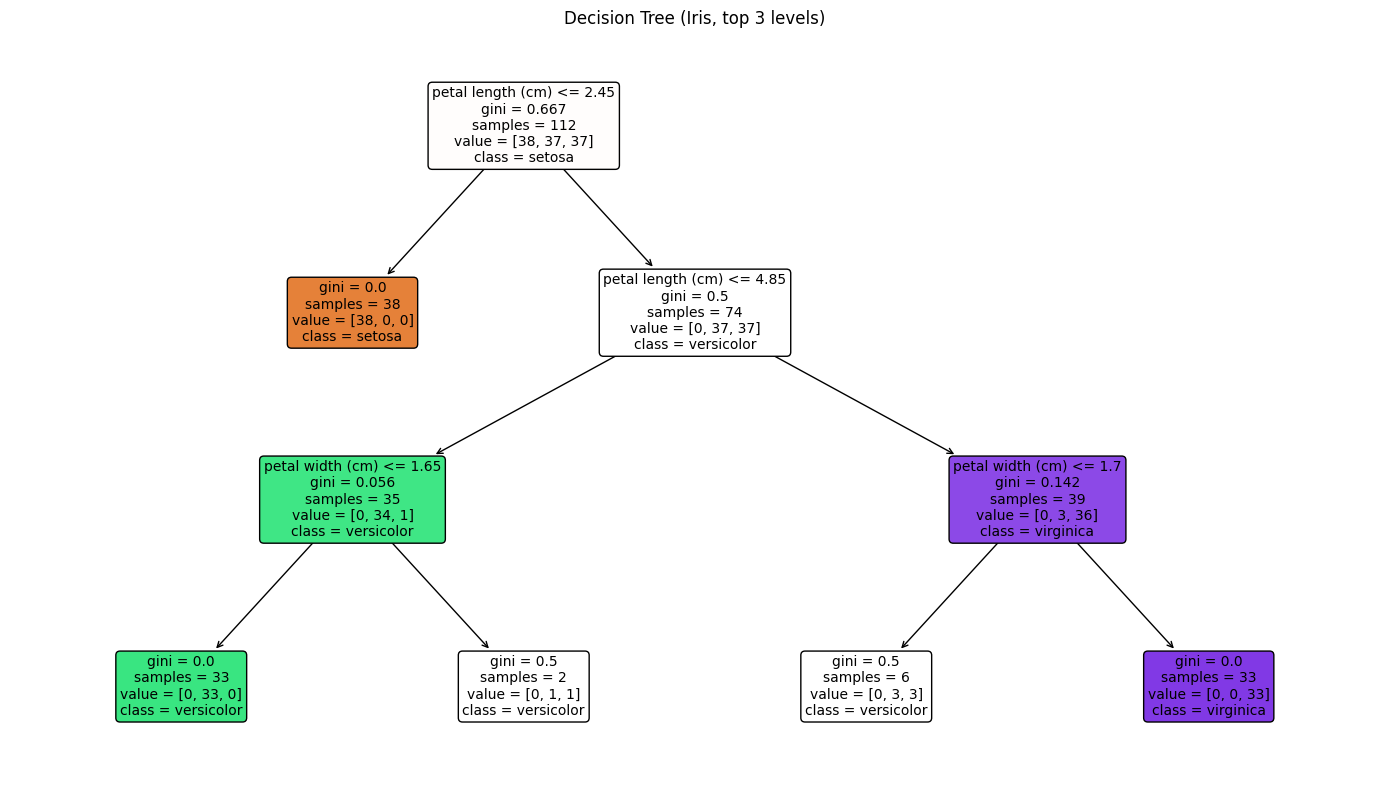

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

iris = datasets.load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
class_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

# Train a decision tree (Gini)
tree = DecisionTreeClassifier(
    criterion="gini",
    max_depth=3,          # keep shallow so the plot is readable
    random_state=42
)
tree.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(14, 8))
plot_tree(
    tree,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    impurity=True,        # show Gini
    proportion=False,     # set True to show class proportions
    fontsize=10
)
plt.title("Decision Tree (Iris, top 3 levels)")
plt.tight_layout()
plt.show()


California Housing is a classic **nonlinear regression problem** where tree ensembles excel. The learning task is to predict median house value from demographics and location.

- **Samples:** 20,640 census tracts (California, ~1990)
- **Target:** `MedHouseVal` — median house value (**100k units**)
- **Features (8 numeric):**
  1. `MedInc` — median income (**10k units**)
  2. `HouseAge` — median house age (years)
  3. `AveRooms` — average rooms per household
  4. `AveBedrms` — average bedrooms per household
  5. `Population` — total number of residents in the block group
  6. `AveOccup` — average household size
  7. `Latitude`
  8. `Longitude`

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


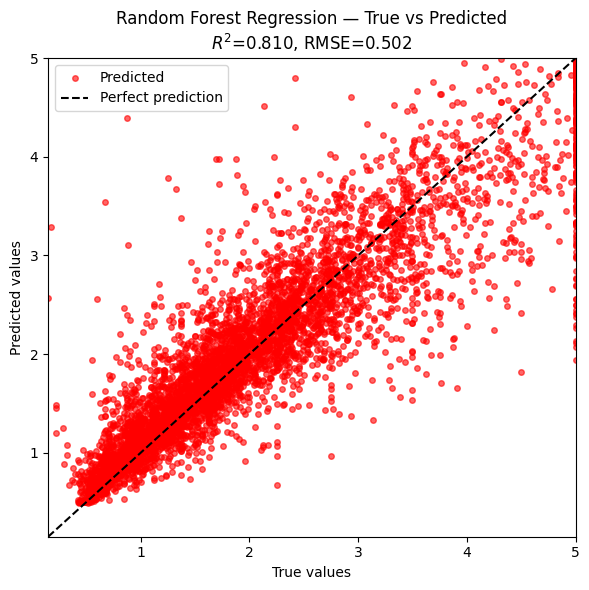

In [20]:
# Random Forest regression on California Housing
# Plot: True vs Predicted (predictions in RED) + 45° reference line

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# Data
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

df = pd.DataFrame(X, columns=feature_names)
df["target"] = y  # median house value in $100,000s

print(df.head(5))

# Model
# unlike for classification, we use all features (max_features = 1.0)! This is a hyperparameter to tune 
rf = RandomForestRegressor(n_estimators=300, max_features=1.0, n_jobs=-1, random_state=42) 
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Metrics
r2  = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# True vs Predicted scatter
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, s=16, alpha=0.6, c="red", label="Predicted")
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, linestyle="--", linewidth=1.5, color="black", label="Perfect prediction")
plt.xlim(lims); plt.ylim(lims)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title(f"Random Forest Regression — True vs Predicted\n$R^2$={r2:.3f}, RMSE={rmse:.3f}")
plt.legend()
plt.tight_layout()
plt.show()


In California Housing, the target is median house value in $100k$ units. The RMSE is around $50.2k$, which is reasonable for an untuned random forest.

In [28]:
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=100,
                              random_state=1)

forest.fit(X_train, y_train)
    
print("Test Accuracy: %0.2f" % forest.score(X_test, y_test))

Test Accuracy: 0.97


# AdaBoost

In [10]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.ensemble import AdaBoostClassifier

iris = datasets.load_iris()
X, y = iris.data[:, [0, 3]], iris.target

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.25, random_state=1)

X_train, X_val, y_train, y_val = \
    train_test_split(X_train, y_train, test_size=0.25, random_state=1)

print('Train/Valid/Test sizes:', y_train.shape[0], y_val.shape[0], y_test.shape[0])

tree = DecisionTreeClassifier(criterion='entropy',
                              random_state=1,
                              max_depth=1)


boost = AdaBoostClassifier(estimator=tree,
                           n_estimators=500,
                           algorithm='SAMME',
                           #n_jobs=1,
                           random_state=1)

boost.fit(X_train, y_train)
    
print("Test Accuracy: %0.2f" % boost.score(X_test, y_test))

Train/Valid/Test sizes: 84 28 38


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Test Accuracy: 0.97


In [12]:
#boost.estimator_weights_

# Gradient Boosting

In [9]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data[:, [0, 3]], iris.target

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.25, random_state=1)

X_train, X_val, y_train, y_val = \
    train_test_split(X_train, y_train, test_size=0.25, random_state=1)

print('Train/Valid/Test sizes:', y_train.shape[0], y_val.shape[0], y_test.shape[0])

Train/Valid/Test sizes: 84 28 38


In [14]:
from sklearn.ensemble import GradientBoostingClassifier


boost = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=8,
    random_state=1)

boost.fit(X_train, y_train)
    
print("Test Accuracy: %0.2f" % boost.score(X_test, y_test))

Test Accuracy: 0.95


In [15]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier


boost = HistGradientBoostingClassifier(
    learning_rate=0.1,
    #n_estimators=100,
    max_depth=8,
    random_state=1)

boost.fit(X_train, y_train)
    
print("Test Accuracy: %0.2f" % boost.score(X_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:19: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Test Accuracy: 0.97


In [10]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier


boost = HistGradientBoostingClassifier(
    learning_rate=0.1,
    max_iter=100,
    early_stopping=True,
    max_depth=8,
    random_state=1)

boost.fit(X_train, y_train)
    
print("Test Accuracy: %0.2f" % boost.score(X_test, y_test))

boost.n_iter_

Test Accuracy: 0.97


52

In [16]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier


boost = HistGradientBoostingClassifier(
    learning_rate=0.5,
    max_iter=100,
    early_stopping=True,
    max_depth=8,
    random_state=1)

boost.fit(X_train, y_train)
    
print("Test Accuracy: %0.2f" % boost.score(X_test, y_test))

boost.n_iter_

Test Accuracy: 0.95


100

In [12]:
# https://xgboost.readthedocs.io/en/latest/build.html

In [7]:
!pip install xgboost


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [10]:
import numpy as np
import xgboost as xgb


dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


param = {
    'max_depth': 8,
    'eta': 0.1,  # learning rate
    'objective': 'multi:softprob',  # loss function for multiclass
    'num_class': 3}  # number of classes

boost = xgb.train(param, dtrain, num_boost_round=100)

y_pred = boost.predict(dtest)
y_labels = np.argmax(y_pred, axis=1)


print("Test Accuracy: %0.2f" % (y_labels == y_test).mean())

Test Accuracy: 0.97


In [12]:
import lightgbm as lgb

# hyperparameters are max depth of decision trees, learning rate, and number of estimators
# since we are not tuning these hyperparameters, we do not use a validation set
boost = lgb.LGBMClassifier(n_estimators=100, 
                           max_depth=8,
                           random_state=1,
                           learning_rate=0.1)

boost.fit(X_train, y_train)

print("Test Accuracy: %0.2f" % boost.score(X_test, y_test))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001607 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 36
[LightGBM] [Info] Number of data points in the train set: 84, number of used features: 2
[LightGBM] [Info] Start training from score -1.211941
[LightGBM] [Info] Start training from score -1.063521
[LightGBM] [Info] Start training from score -1.029619
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


# Stacking

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from mlxtend.classifier import StackingClassifier


clf1 = KNeighborsClassifier(n_neighbors=5)
clf2 = RandomForestClassifier(random_state=1)
clf3 = HistGradientBoostingClassifier(random_state=1)
clf4 = AdaBoostClassifier(random_state=1)
clf5 = DecisionTreeClassifier(random_state=1,
                              max_depth=None)

lr = LogisticRegression(random_state=1)

sclf = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4, clf5], 
                          meta_classifier=lr)


sclf.fit(X_train, y_train)
print("Train Accuracy: %0.2f" % sclf.score(X_train, y_train))
print("Test Accuracy: %0.2f" % sclf.score(X_test, y_test))

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from mlxtend.classifier import StackingCVClassifier


clf1 = KNeighborsClassifier(n_neighbors=5)
clf2 = RandomForestClassifier(random_state=1)
clf3 = HistGradientBoostingClassifier(random_state=1)
clf4 = AdaBoostClassifier(random_state=1)
clf5 = DecisionTreeClassifier(random_state=1,
                              max_depth=None)

lr = LogisticRegression(random_state=1)

sclf = StackingCVClassifier(classifiers=[clf1, clf2, clf3, clf4, clf5], 
                            meta_classifier=lr, 
                            cv=10,
                            random_state=1)


sclf.fit(X_train, y_train)
print("Train Accuracy: %0.2f" % sclf.score(X_train, y_train))
print("Test Accuracy: %0.2f" % sclf.score(X_test, y_test))

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import StackingClassifier


clf1 = KNeighborsClassifier(n_neighbors=5)
clf2 = RandomForestClassifier(random_state=1)
clf3 = HistGradientBoostingClassifier(random_state=1)
clf4 = AdaBoostClassifier(random_state=1)
clf5 = DecisionTreeClassifier(random_state=1,
                              max_depth=None)

lr = LogisticRegression(random_state=1)

estimators = [('clf1', clf1),
              ('clf2', clf2),
              ('clf3', clf3),
              ('clf4', clf4),
              ('clf5', clf5)]

sclf = StackingClassifier(estimators=estimators, 
                          final_estimator=lr, 
                          cv=10)


sclf.fit(X_train, y_train)
print("Train Accuracy: %0.2f" % sclf.score(X_train, y_train))
print("Test Accuracy: %0.2f" % sclf.score(X_test, y_test))

In [ ]:
# stack_method{‘auto’, ‘predict_proba’, ‘decision_function’, ‘predict’}, default=’auto’


from mlxtend.classifier import StackingCVClassifier


sclf = StackingCVClassifier(classifiers=[clf1, clf2, clf3, clf4, clf5], 
                            meta_classifier=lr, 
                            use_probas=True,
                            drop_proba_col='last',
                            #use_features_in_secondary=True,
                            cv=10,
                            random_state=1)


sclf.fit(X_train, y_train)
print("Train Accuracy: %0.2f" % sclf.score(X_train, y_train))
print("Test Accuracy: %0.2f" % sclf.score(X_test, y_test))